In [27]:
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from utilities import boostHistHelpers as hh,input_tools
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [44]:
dyturbo = input_tools.read_dyturbo_file("/scratch/shared/TheoryPredictions/DYTurbo/wmass/results_n3ll_born_2d.txt")


Should we offset? 1360
[-5.0, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]
Should we offset? 1360
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
[Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  5.  ]), name='y'), Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36

In [34]:
dyturbo[-1,0] == dyturbo[0,0]and dyturbo[-1,1] == dyturbo[0,1]

False

In [29]:
np.reshape(dyturbo[:-1,4:], (34, 40, 2))

ValueError: cannot reshape array of size 2718 into shape (34,40,2)

In [74]:
dyturbo = input_tools.read_dyturbo_hist(path="/scratch/shared/TheoryPredictions/DYTurbo/wmass/",
    filenames=["results_nnlo_ct_2d.txt", "results_n3ll_born_2d.txt", "results_nnlo_vj_2d.txt"])
    #filenames=["results_nnlo_ct_2d.txt"])
    #filenames=["results_n3ll_born_2d.txt"])




-5.0 -5.0 5.0 5.0
Should we offset? True (1600, 6) (1600, 6)
0.0 0.0 40.0 40.0
Should we offset? True (1600, 6) (1600, 6)
[Variable(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75,  5.  ]), name='y'), Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), underflow=False, name='pt')]
(40, 40, 2)
4.0 -5.0 5.0 5.0
Should we offset? False (1360, 6) (1359, 6)
39.0 0.0 40.0 39.0
Should we offset? False (1360, 6) (1359, 6)
[Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff0eaac5600>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

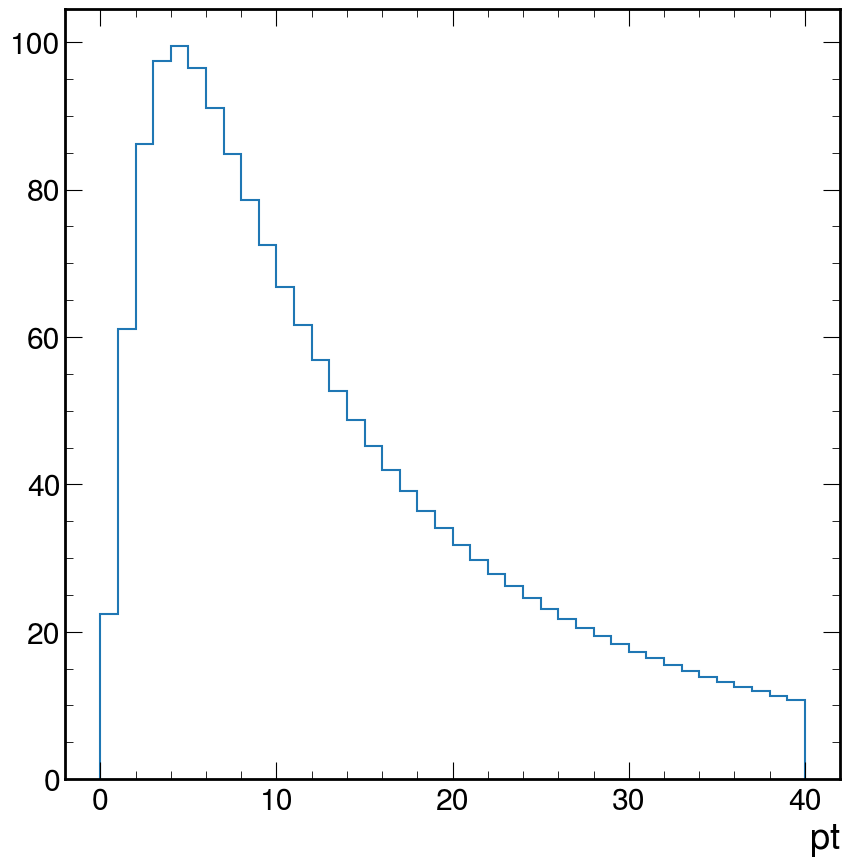

In [78]:
dyturbo.project("pt").plot()

In [ ]:
hh.divideHists(coeffs[...,3,1,1].project("ptVgen", "absYVgen"), coeffs[...,2,1,1].project("ptVgen", "absYVgen")).plot()

In [ ]:
coeff = 1
coeffs[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 1}].project("ptVgen", "absYVgen").plot()
plt.title(f"A$_{coeff-1}$ fraction" if coeff != 0 else "Const. term")